In [1]:
from instagrapi import Client
from instagrapi.types import Usertag, Location

from dotenv import load_dotenv
import config
import os

In [12]:
class InstagramAPI:
    def __init__(self):
        self.client = Client()
        self.origin_tags = ['블로그', '개발자', '기획자', 'AI']
        self.setting()
    
    def __del__(self):
        self.client.logout()
        
    def setting(self):
        load_dotenv()
        self.client.login(os.getenv('META_ACCOUNT_USERNAME'),
                            os.getenv('META_ACCOUNT_PASSWORD'))
        
        # self.client.account_info()

    def set_caption(self, title, tags:list, detail=None):
        res = '[ ' + title + " ]\n"
        if detail:
            res += detail + "\n"
        res += "\n\n\nPlease check the profile link for details." + "\n"
        res += "@gwani_17 @gwani_portfolio" + "\n"
        for tag in tags + self.origin_tags:
            res += '#' + tag + ' '
        return res
    
    def post_photo(self, path_to_photo, caption):
        user = self.client.user_info_by_username('gwani_17')
        media = self.client.photo_upload(path=path_to_photo, caption=caption,
                                        usertags=[Usertag(user=user, x=0.5, y=0.5)],
                                        extra_data={"custom_accessibility_caption": "alt text example",
                                                    "like_and_view_counts_disabled": 0,
                                                    "disable_comments": 0})
        return media.dict()
            

    def post_story(self, path_to_photo, caption):
        self.client.story_upload(path_to_photo, caption=caption)

In [13]:
insta = InstagramAPI()

In [6]:
insta.client.account_info()

Account(pk='28011841027', username='gwani_portfolio', full_name='김택관', is_private=False, profile_pic_url=HttpUrl('https://scontent-hkg4-2.cdninstagram.com/v/t51.2885-19/341004668_230898352818628_4752525786048619772_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-hkg4-2.cdninstagram.com&_nc_cat=104&_nc_ohc=_9CHDBECv3gAX_pIGvO&edm=AJlpnE4BAAAA&ccb=7-5&oh=00_AfDHoGqd2SyIDPhX_eFYc0zwty1qEZLhCMOk3hc_tBjSvQ&oe=6440B3FC&_nc_sid=312772', ), is_verified=False, biography='@gwani_17', external_url='http://kimtaekgwan.oopy.io', is_business=True, birthday='2000-07-17', phone_number='+821041732612', gender=3, email='sbe07032@naver.com')

# 게시물 포스팅하기

In [16]:
path_to_photo = 'data/230416.jpg'
title = 'CH 001. why?'
tags = ['why', '도전', '계획관리', '기록', '여유']

In [17]:
caption = insta.set_caption(title, tags)
print(caption)

[ CH 001. why? ]



Please check the profile link for details.
@gwani_17 @gwani_portfolio
#why #도전 #계획관리 #기록 #여유 #블로그 #개발자 #기획자 #AI 


In [18]:
insta.post_photo(path_to_photo, caption)

{'pk': '3082233733569603971',
 'id': '3082233733569603971_28011841027',
 'code': 'CrGS0AUJGmD',
 'taken_at': datetime.datetime(2023, 4, 16, 13, 15, 15, tzinfo=datetime.timezone.utc),
 'media_type': 1,
 'image_versions2': {'candidates': [{'width': 1080,
    'height': 1080,
    'url': 'https://scontent-hkg4-1.cdninstagram.com/v/t51.2885-15/341521825_919039599141151_7220269742114982161_n.jpg?stp=dst-jpg_e35_s1080x1080&_nc_ht=scontent-hkg4-1.cdninstagram.com&_nc_cat=107&_nc_ohc=YI8xfUAZuC8AX8L5Meq&edm=ACqnv0EBAAAA&ccb=7-5&ig_cache_key=MzA4MjIzMzczMzU2OTYwMzk3MQ%3D%3D.2-ccb7-5&oh=00_AfD1BrfpCgpjzBpPk__VR7JNRdoIwPAUUqRNIULQ9RjJyQ&oe=644086D6&_nc_sid=9ec724',
    'scans_profile': 'e35',
    'estimated_scans_sizes': [89151,
     178303,
     267455,
     356607,
     445759,
     538031,
     651329,
     725365,
     802367]},
   {'width': 360,
    'height': 360,
    'url': 'https://scontent-hkg4-1.cdninstagram.com/v/t51.2885-15/341521825_919039599141151_7220269742114982161_n.jpg?stp=dst-jpg_

---

# 스토리 공유

In [3]:
from instagrapi import Client
from instagrapi.types import Usertag, Location
from instagrapi.types import StoryMention, StoryMedia, StoryLink, StoryHashtag


from dotenv import load_dotenv
import os

load_dotenv()

True

In [4]:
cl = Client()
cl.login(os.getenv('META_ACCOUNT_USERNAME'), os.getenv('META_ACCOUNT_PASSWORD'))

True

'28011841027'

In [11]:
user_id = int(cl.account_info().pk)
media_pk = cl.user_medias_gql(user_id=user_id, amount=5, sleep= 2)[0].pk
media_pk

'3081529250317343363'

In [13]:
media_path = cl.photo_download(media_pk=media_pk, folder='data')

In [22]:
gwani_17 = cl.user_info_by_username('gwani_17')
hashtag = cl.hashtag_info('dhbastards')

cl.photo_upload_to_story(
    path='data/0000.jpg',
    caption="Credits @gwani",
    mentions=[StoryMention(user=gwani_17, x=0.49892962, y=0.703125, width=0.02, height=0.125)],
    links=[StoryLink(webUri='https://kimtaekgwan.oopy.io', x=0.3, y=0.7, width=1,z=0.2)],
    hashtags=[StoryHashtag(hashtag=hashtag, x=0.23, y=0.32, width=0.5, height=0.22 )],
    medias=[StoryMedia(media_pk=media_pk, x=0, y=0, width=0.02, height=0.02)])

Story(pk='3081578258981282771', id='3081578258981282771_28011841027', code='CrD9xmCJWPT', taken_at=datetime.datetime(2023, 4, 15, 15, 32, 48, tzinfo=datetime.timezone.utc), media_type=1, product_type='story', thumbnail_url=HttpUrl('https://scontent-hkg4-1.cdninstagram.com/v/t51.2885-15/330030126_775582873823935_1973275915834431244_n.jpg?stp=dst-jpg_e35&_nc_ht=scontent-hkg4-1.cdninstagram.com&_nc_cat=107&_nc_ohc=X-w-8-HkUhMAX-6I5UK&edm=AO5kzY0BAAAA&ccb=7-5&ig_cache_key=MzA4MTU3ODI1ODk4MTI4Mjc3MQ%3D%3D.2-ccb7-5&oh=00_AfCFU_Hkyz9eFBZRUE5LCi6Honu4iveE1Q3UKyFhzouulA&oe=643CB65A&_nc_sid=560b88', ), user=UserShort(pk='28011841027', username='gwani_portfolio', full_name='김택관', profile_pic_url=HttpUrl('https://scontent-hkg4-2.cdninstagram.com/v/t51.2885-19/341004668_230898352818628_4752525786048619772_n.jpg?stp=dst-jpg_s150x150&_nc_ht=scontent-hkg4-2.cdninstagram.com&_nc_cat=104&_nc_ohc=_9CHDBECv3gAX_pIGvO&edm=AO5kzY0BAAAA&ccb=7-5&oh=00_AfAI5xkcCt5Jl-m8uRsCJTa3bOty7MaEgBGByUnsrC9W3A&oe=643EB9BC

In [17]:
if api.login():
    # 게시물 ID 추출
    media_id = api.media_id_from_url(media_url)

    # 게시물 정보 가져오기
    media_info = api.media_info(media_id)

    # 스토리에 게시물 추가
    api.share_media(media_id, media_type='photo')

'1707336878'

In [8]:
user = insta.client.user_info_by_username('taemin_25')
insta.client.user_stories(user_id = int(user.pk))

NameError: name 'insta' is not defined

In [5]:
from instagrapi import Client

cl = Client()
cl.login(os.getenv('META_ACCOUNT_USERNAME'), os.getenv('META_ACCOUNT_PASSWORD'))

# user_id = cl.user_id_from_username("adw0rd")
# medias = cl.user_medias(user_id, 20)

True

Status 200: JSONDecodeError in public_request (url=https://www.instagram.com/challenge/?next=/graphql/query/%253Fvariables%253D%25257B%252522id%252522%25253A%25252222643345487%252522%25252C%252522include_reel%252522%25253Atrue%25252C%252522fetch_mutual%252522%25253Afalse%25252C%252522first%252522%25253A12%25252C%252522after%252522%25253A%252522QVFBWHZ2TUN2Sk84S1NVZllIbTRTZnBaNnlhMnM4N0dLVmFZclhFTjhTVVdDUzNPdm5fRjQyVkdSVTEtMTV1N2wySzNrc1RnVVFaODJfS1NWM3JKbXBQWg%25253D%25253D%252522%25257D%2526query_hash%253D5aefa9893005572d237da5068082d8d5) >>> <!DOCTYPE html>
<html lang="en" class="no-js logged-in client-root">
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

        <title>
Instagram
</title>

        
        <meta name="robots" content="noimageindex, noarchive">
        <meta name="apple-mobile-web-app-status-bar-style" content="default">
        <meta name="mobile-web-app-capable" content="yes">
        <meta name="theme-color
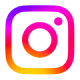
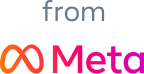
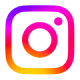
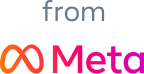
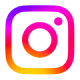
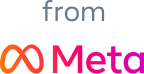

ChallengeRequired: challenge_required

In [18]:
user_id = cl.user_id_from_username("justboit_00")
# medias = cl.user_medias(user_id)
followers = cl.user_followers(user_id=user_id)

In [ ]:
cl.fo

In [16]:
user_id

'22643345487'

In [17]:
medias

[Media(pk='2768776689889364305', id='2768776689889364305_22643345487', code='CZsq7rXPMlR', taken_at=datetime.datetime(2022, 2, 8, 1, 32, 3, tzinfo=datetime.timezone.utc), media_type=8, image_versions2={}, product_type='', thumbnail_url=None, location=None, user=UserShort(pk='22643345487', username='justboit_00', full_name='', profile_pic_url=None, profile_pic_url_hd=None, is_private=None, stories=[]), comment_count=13, comments_disabled=False, commenting_disabled_for_viewer=False, like_count=100, play_count=None, has_liked=None, caption_text='“문화는 언어의 조건이며 동시에 그 산물이다 (J.듀이)”\n\n🖤 𝟐𝟐.𝟎𝟐.𝟎𝟓.𝐒𝐀𝐓 👩🏻\u200d✈️ 🖤\n: 한문화외교사절단의 공식 일정 시작 \n\n목동에서\n발대식 진행 및 교육 받고 \n🚍 현충원으로 이동 \n\n영하 10도에 바람도 쌩쌩불었지만 🥶\n문화외교사절단으로서 \n호국영령들의 명복을 비는 자리에서 \n내 추위보다는 격식이 더 중요하기 \n모두 겉옷은 ❌ \n\n특별한 활동을 한건 아니지만\n내가 저 자리에 함꼐 할 수 있음에 넘나 신나는 요즘이다 ☺️\n\n#한문화외교사절단 #KCDM \n#한문화진흥협회  #koreanculture \n#일상을여행으로', accessibility_caption=None, usertags=[Usertag(user=UserShort(pk='2955659478', username='heraldbusiness', full_name='', pro

In [5]:
import requests
import config
import json
import os

In [15]:
from dotenv import load_dotenv

load_dotenv()

True

In [10]:
import requests
import json
import base64

# 인증 정보
access_token = os.getenv("meta_access_token") #액세스 토큰 입력
url = "https://graph.instagram.com/me/stories?access_token=" + access_token

# 스토리 업로드
image_url = "https://miro.medium.com/v2/resize:fit:4800/format:webp/1*WeVFxA-Uhon5upZ2iTS6RA.png"
image_data = requests.get(image_url).content
b64_image_data = base64.b64encode(image_data).decode('utf-8')

payload = {
    "media_type": "PHOTO",
    "media_data": b64_image_data
}

response = requests.post(url, data=payload)

# 결과 출력
print(response.json())



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [16]:
page_id_1 = 'sbe07032@naver.com' #페이스북ID 입력

access_token = os.getenv("meta_access_token") #액세스 토큰 입력
post_url = 'https://graph.facebook.com/v13.0/' + str(page_id_1) + '?fields=instagram_business_account&access_token=' + str(access_token)

r = requests.get(post_url)

#print(r.text)

insta_biz_acc = r.json() 

ig_user_id = insta_biz_acc['instagram_business_account']['id']

print(ig_user_id)  # 인스타그램 비즈니스 계정 ID

KeyError: 'instagram_business_account'

In [ ]:
insta_biz_acc

{'error': {'message': 'Error validating access token: The session is invalid because the user logged out.',
  'type': 'OAuthException',
  'code': 190,
  'error_subcode': 467,
  'fbtrace_id': 'AIxK3F1r5W6w9bhQzm6jrpb'}}